CMSC320 Checkpoint 2

Noah Der Garabedian, Shlok Desai, Yuvraj Rekh

Data Preprocessing:

We can import our data into a pandas dataframe by first downloading and extracting the csv files from here: https://www.kaggle.com/datasets/rikdifos/credit-card-approval-prediction and then using pd.read_csv for both of them

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

application_record = pd.read_csv('application_record.csv')
credit_record = pd.read_csv('credit_record.csv')
application_record.head() #Display the first 5 application records

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [2]:
credit_record.head() #display the first 5 credit recrods

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


To best organize our data, we can merge our datasets using the ID of each of them. We will use an inner join so we drop IDs without either an application or credit record as we need both:

In [3]:
total_dataset = pd.merge(application_record, credit_record, on='ID', how='inner')  # 'inner' join keeps only matching IDs
total_dataset.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C


We can also see the datatypes given by the dataset match what is in each record:

In [4]:
total_dataset.dtypes

,0
ID,int64
CODE_GENDER,object
FLAG_OWN_CAR,object
FLAG_OWN_REALTY,object
CNT_CHILDREN,int64
AMT_INCOME_TOTAL,float64
NAME_INCOME_TYPE,object
NAME_EDUCATION_TYPE,object
NAME_FAMILY_STATUS,object
NAME_HOUSING_TYPE,object


Additionally the only column with missing values is the occupation type which we have yet to determine if we are going to end up using.

In [5]:
total_dataset.isna().sum()

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


Basic data exploration and summary statistics

Method 1: Using descriptive statistics and visuals to find outliers of annual income

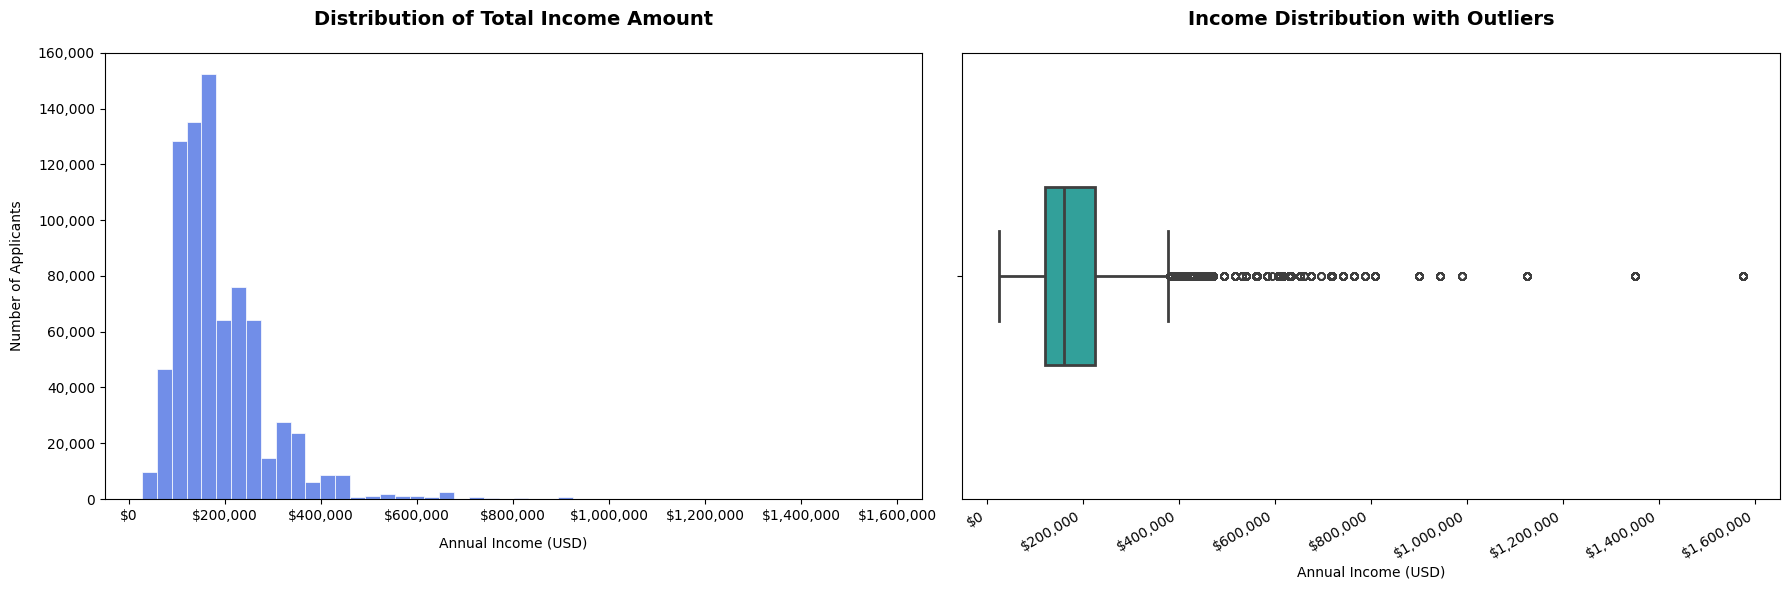

In [6]:
import matplotlib.ticker as ticker



# create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# plotting the Histogram
hist = sns.histplot(total_dataset['AMT_INCOME_TOTAL'], bins=50, ax=ax1,
                    color='royalblue', edgecolor='white', linewidth=0.5)
ax1.set_title('Distribution of Total Income Amount', pad=20, fontsize=14, fontweight='bold')
ax1.set_xlabel('Annual Income (USD)', labelpad=10)
ax1.set_ylabel('Number of Applicants', labelpad=10)

# make it so the tickers are formatted for monetary amounts
ax1.xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))


# Boxplot
box = sns.boxplot(x=total_dataset['AMT_INCOME_TOTAL'], ax=ax2, color='lightseagreen',
                  width=0.4, linewidth=2, flierprops=dict(marker='o', markersize=5))
ax2.set_title('Income Distribution with Outliers', pad=20, fontsize=14, fontweight='bold')
ax2.set_xlabel('Annual Income (USD)')

# make it so the tickers are formatted for monetary amounts
ax2.xaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))


plt.setp(ax2.get_xticklabels(), rotation=30, ha='right')


plt.tight_layout() # make it so the graphs appear side by side
plt.show()

From both the histogram and boxplot, we can find that the data for the total annual income of applicants is right skewed and that there are numerous outliers who make above $400,000 a year and upwards of almost $1.6 million a year. We can also print the number of outliers with the following code:

In [7]:
Q1 = total_dataset['AMT_INCOME_TOTAL'].quantile(0.25)
Q3 = total_dataset['AMT_INCOME_TOTAL'].quantile(0.75)
IQR = Q3 - Q1
# filters for outliers using the formula x > Q3 + 1.5 * IQR
outliers = total_dataset[(total_dataset['AMT_INCOME_TOTAL'] > Q3 + 1.5 * IQR)]
print(f"Number of outliers: {len(outliers)}")

Number of outliers: 33987


From this output and formula we can find that there are approximately 33987 outliers of annual income within the dataset.

Method 2: Using correlation analysis to examine the relationship between the number of children and credit status

In [8]:
status_map = {
    'X': -1,  # No loan
    'C': -1,  # Paid off
    '0': 0,   # 1-29 days past due
    '1': 1,   # 30-59 days past due
    '2': 2,   # 60-89 days overdue
    '3': 3,   # 90-119 days overdue
    '4': 4,   # 120-149 days overdue
    '5': 5    # Overdue / bad debts >150 days
}

total_dataset['numeric_status'] = total_dataset['STATUS'].map(status_map)

In [13]:
# Drop rows where numeric_status is NaN
filtered_df = total_dataset.dropna(subset=['numeric_status', 'CNT_CHILDREN'])

# Create a boolean column indicating past due vs. no loan/paid off
filtered_df['is_past_due'] = (filtered_df['numeric_status'] >= 0)

# group by the child count
group_cols = ['CNT_CHILDREN']

# Proportion of each group that has any past-due status (mean of 'is_past_due')
grouped_df = (
    filtered_df
    .groupby(group_cols)
    .agg(
        proportion_past_due = ('is_past_due', 'mean'),
        count_in_group      = ('ID', 'count')
    )
    .reset_index()
)

# Average overdue status (among overdue rows only)
overdue_only = filtered_df[filtered_df['numeric_status'] >= 0].copy()
avg_status_df = (
    overdue_only
    .groupby(group_cols)
    .agg(avg_overdue_status = ('numeric_status', 'mean'),
         overdue_count      = ('ID', 'count'))
    .reset_index()
)

# Merge the two results
merged_stats = pd.merge(grouped_df, avg_status_df, on='CNT_CHILDREN', how='left')

# Fill NaNs in avg_overdue_status with 0 or some placeholder if a group had no overdue at all
merged_stats['avg_overdue_status'] = merged_stats['avg_overdue_status'].fillna(0)

merged_stats

,CNT_CHILDREN,proportion_past_due,count_in_group,avg_overdue_status,overdue_count
0,0,0.387715,540639,0.063064,209614
1,1,0.392179,155638,0.075691,61038
2,2,0.387108,70399,0.058968,27252
3,3,0.387864,9328,0.055832,3618
4,4,0.417484,1224,0.068493,511
5,5,0.243827,324,0.000000,79
6,7,0.521739,46,0.416667,24
7,14,0.783784,111,0.057471,87
8,19,1.000000,6,0.000000,6


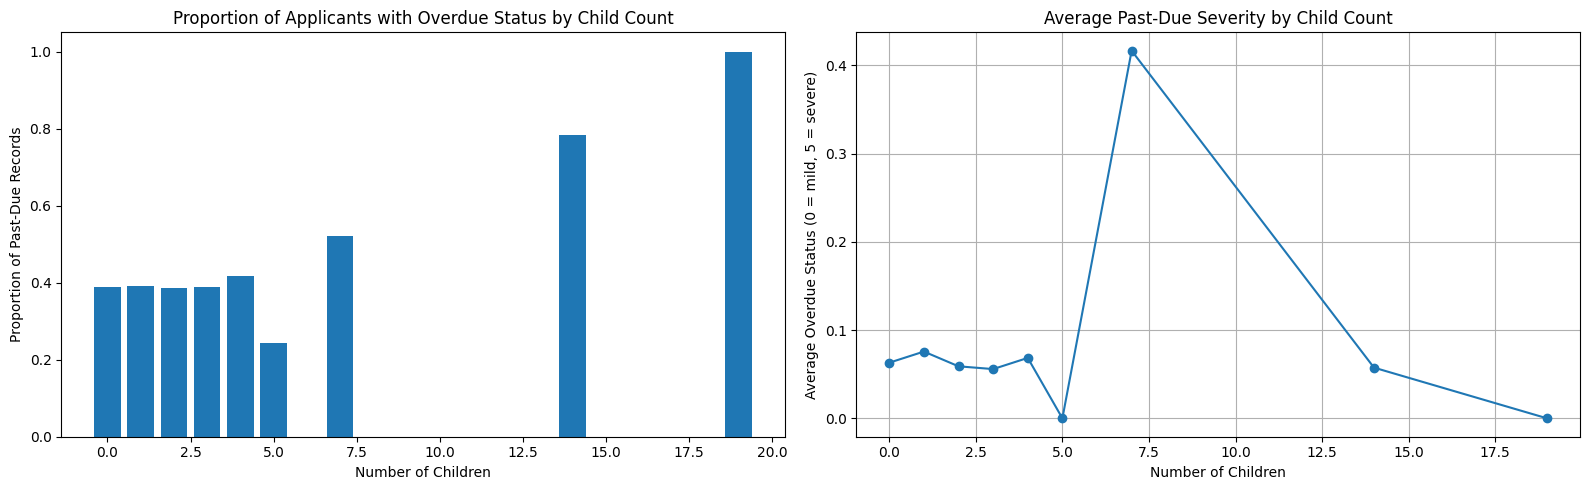

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 5))

# Proportion of Past-Due Records
ax1.bar(merged_stats['CNT_CHILDREN'], merged_stats['proportion_past_due'])
ax1.set_xlabel('Number of Children')
ax1.set_ylabel('Proportion of Past-Due Records')
ax1.set_title('Proportion of Applicants with Overdue Status by Child Count')

# Average Overdue Status
ax2.plot(merged_stats['CNT_CHILDREN'], merged_stats['avg_overdue_status'], marker='o')
ax2.set_xlabel('Number of Children')
ax2.set_ylabel('Average Overdue Status (0 = mild, 5 = severe)')
ax2.set_title('Average Past-Due Severity by Child Count')
ax2.grid(True)

plt.tight_layout()
plt.show()

**Conclusion:**  
From 0–4 children, the overdue proportion consistently hovers around 38–42%. This indicates very low correlation for this range of children count. It jumps noticeably for families with 7 or more children (52% for 7, 78% for 14, and even 100% for 19), but these categories have very small sample sizes (46, 111, and 6 records, respectively). As a result, while the data suggests that larger families **might** face higher overdue rates, we cannot draw a firm conclusion given how few cases exist in those extreme groups.